In [19]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from scipy import stats

survey_path = "CSCI_Fall_2024_survey.csv"
survey_df = pd.read_csv(survey_path)
survey_df.head(10)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,On campus,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,cs/ finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,Off campus,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,On campus,Yes,Computer Science; considering an additional ma...,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,Off campus,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd


In [20]:
# Standardizing Pets
pets = {"What is your name?": ["Alex", "Tanay", "Akshita", "Anthony", "Nuri", "Mahley", "Chetan", "Steven", "Nico",
                                   "Iovane", "Brandon", "Carter", "Tanav", "Abhishek", "Garlo", "Vivek", "Abhilasha",
                                   "Tony", "Finn", "Ben", "Harsh", "Drake", "Issac", "Tony ", "Esme", "Alan"],
            "How many pets do you have?": [1, 0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 7, 8, 0, 0, 3, 0],
            "What kind of pets do you have?": ["Dog", "N/A", "N/A", "Dog", "N/A", "N/A", "N/A", "N/A", "Dog and Cat",
                                               "Dog and Cat", "N/A", "Dog", "N/A", "N/A", "N/A", "N/A", "Dog and Cat",
                                               "Dog", "Dog", "Dog", "N/A", "Dog and Cat", "Dog", "N/A", "Dog", "N/A"]}
pets_df = pd.DataFrame(pets)
new_survey_df = pd.merge(survey_df, pets_df, on = "What is your name?")

# Standardizing Birthplaces
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "Frankfurt, Germany", "What state/country were you born in?"] = "Germany"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "st. louis, mo", "What state/country were you born in?"] = "Missouri"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "St. Louis MO", "What state/country were you born in?"] = "Missouri"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "Missouri, USA", "What state/country were you born in?"] = "Missouri"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "Georgia (the country not the state)", "What state/country were you born in?"] = "Georgia"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "st.louis mo", "What state/country were you born in?"] = "Missouri"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "Saint Louis, Missouri", "What state/country were you born in?"] = "Missouri"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "Kansas, Overland Park", "What state/country were you born in?"] = "Kansas"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "United States Missouri ", "What state/country were you born in?"] = "Missouri"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "I was born in Chandigarh, India!", "What state/country were you born in?"] = "India"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "People's Republic of China", "What state/country were you born in?"] = "China"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "TEXAS", "What state/country were you born in?"] = "Texas"
new_survey_df.loc[new_survey_df["What state/country were you born in?"] == "Kazakhstah", "What state/country were you born in?"] = "Kazakhstan"

# Standardizing Majors
new_survey_df.loc[new_survey_df["What is your major?"] == "computer science", "What is your major?"] = "Computer Science"
new_survey_df.loc[new_survey_df["What is your major?"] == "cs/ finance ", "What is your major?"] = "CS/Finance"
new_survey_df.loc[new_survey_df["What is your major?"] == "comp sci", "What is your major?"] = "Computer Science"
new_survey_df.loc[new_survey_df["What is your major?"] == "Biology w/ evolutionary bio minor", "What is your major?"] = "Biology"
new_survey_df.loc[new_survey_df["What is your major?"] == "Computer Science, B.A. (I might switch to B.S., but I wish to pursue a career in digital IP law, eventually!)", "What is your major?"] = "Computer Science"
new_survey_df.loc[new_survey_df["What is your major?"] == "Computer Science; considering an additional major or a minor", "What is your major?"] = "Computer Science"
new_survey_df.loc[new_survey_df["What is your major?"] == "Computer science", "What is your major?"] = "Computer Science"
new_survey_df.loc[new_survey_df["What is your major?"] == "Data science", "What is your major?"] = "Data Science"
new_survey_df

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,How many pets do you have?,What kind of pets do you have?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,...,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls,1,Dog
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,...,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,0,N/A
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,Germany,1,0-3 months,Freshman,No,no pets!,Italian,...,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,0,N/A
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,...,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,2,Dog
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,Missouri,2,1-2 years,Freshman,No,0,American,...,No,Computer Science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,0,N/A
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,...,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print,0,N/A
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,...,No,CS/Finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is,0,N/A
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,Missouri,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,...,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls,2,N/A
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,Missouri,2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,...,Yes,Computer Science,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd,3,Dog and Cat
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia,4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,...,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd,0,Dog and Cat


<Axes: ylabel='What is your name?'>

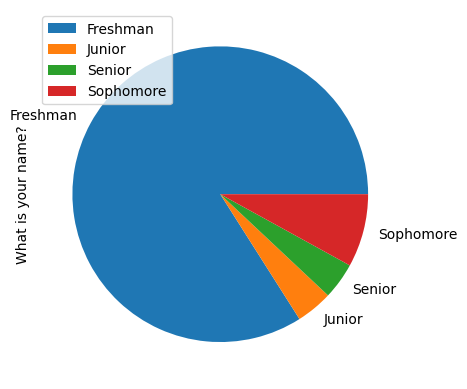

In [21]:
#Pie Chart (Class)
agg_class = new_survey_df.groupby("What class are you in? ").count()
agg_class.plot(kind = "pie", y = "What is your name?")
# The pie chart shows that the overwhelming majority of the class is freshman.

Text(0.5, 1.0, 'Favorite Cuisines in Class')

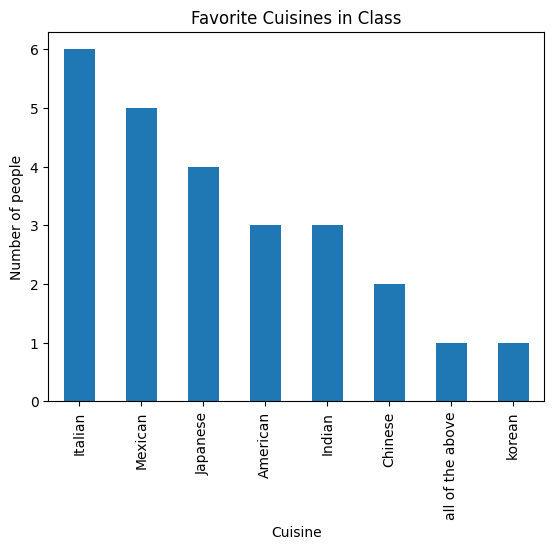

In [22]:
#Histogram (Food)
food_count = new_survey_df["What is your favorite type of food?"].value_counts()
food_count.plot(kind = "bar")
plt.xlabel("Cuisine")
plt.ylabel("Number of people")
plt.title("Favorite Cuisines in Class")
# According to the class, the most popular cuisine is Italian, while the least popular favorite is Korean.

Text(0.5, 1.0, 'Amount of Programming Experience in This Class')

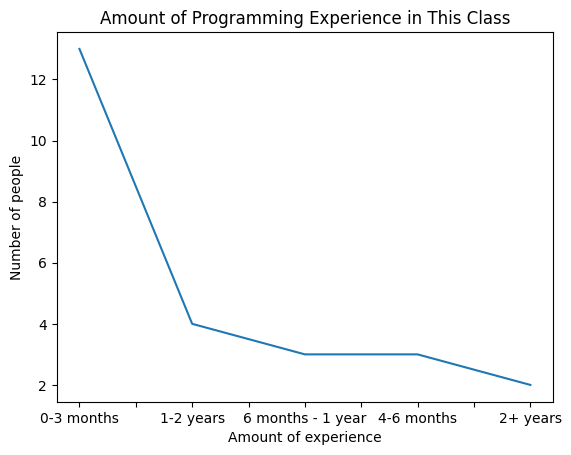

In [23]:
# Line graph (Age)
experience = new_survey_df["How much experience do you have programming?"].value_counts()
experience.plot()
plt.xlabel("Amount of experience")
plt.ylabel("Number of people")
plt.title("Amount of Programming Experience in This Class")
# The line graph shows there are less people with more programming experience.

<Axes: ylabel='What is your name?'>

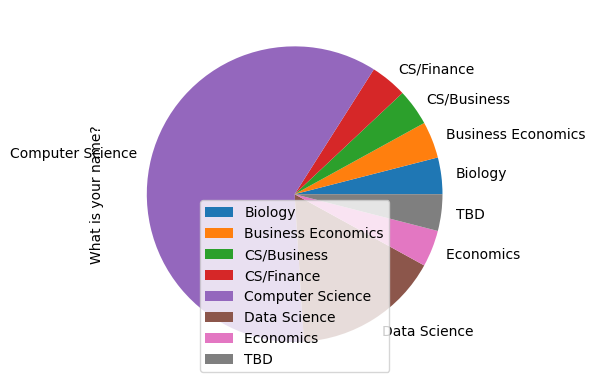

In [24]:
# Pie Chart (Programming length)
agg_major = new_survey_df.groupby("What is your major?").count()
agg_major.plot(kind = "pie", y = "What is your name?")
# The graph shows that the people in the class major in different things, but the popular major in the class Computer Science.

([<matplotlib.axis.YTick at 0x16b6e5ad880>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14'),
  Text(0, 16, '16'),
  Text(0, 18, '18')])

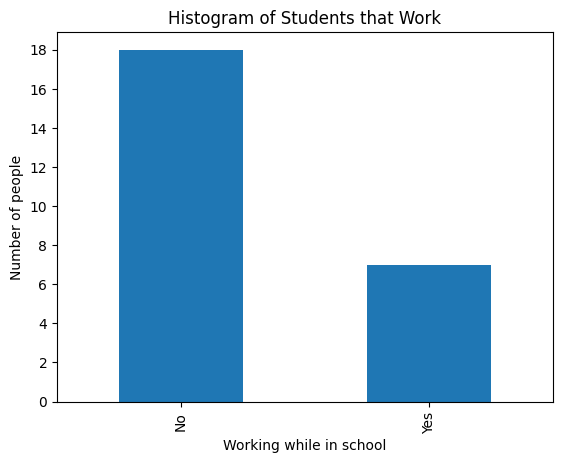

In [17]:
# Histogram (Working while in school)
work_count = new_survey_df["Are you working while in school?"].value_counts()
work_count.plot(kind = "bar")
plt.xlabel("Working while in school")
plt.ylabel("Number of people")
plt.title("Histogram of Students that Work")
plt.yticks(np.arange(0, 20, step = 2))
# This graph shows that most of the students in the class don't work right now.